**Описание проекта**


Контекст


Вы — аналитик крупного интернет-магазина. Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки.
Приоритизируйте гипотезы, запустите A/B-тест и проанализируйте результаты. 

**Часть 1. Приоритизация гипотез.**


В файле /datasets/hypothesis.csv 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.

Задача

1) Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.

2) Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.

3) Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.


**Часть 2. Анализ A/B-теста**


Вы провели A/B-тест и получили результаты, которые описаны в файлах /datasets/orders.csv и /datasets/visitors.csv.

Задача

Проанализируйте A/B-тест:
- Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.
- Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.
- Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.
- Постройте график кумулятивного среднего количества заказов на посетителя по группам. Сделайте выводы и предположения.
- Постройте график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сделайте выводы и предположения.
- Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.
- Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.
- Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.
- Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.
- Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сделайте выводы и предположения.
- Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.
- Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделайте выводы и предположения.
- Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.


Примите решение по результатам теста и объясните его. Варианты решений:

1. Остановить тест, зафиксировать победу одной из групп.

2. Остановить тест, зафиксировать отсутствие различий между группами.

3. Продолжить тест.

**Описание данных**

**Данные для первой части**

*Файл /datasets/hypothesis.csv.*

- `Hypothesis` — краткое описание гипотезы;
- `Reach` — охват пользователей по 10-балльной шкале;
- `Impact` — влияние на пользователей по 10-балльной шкале;
- `Confidence` — уверенность в гипотезе по 10-балльной шкале;
- `Efforts` — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

**Данные для второй части**

*Файл /datasets/orders.csv.*

- `transactionId` — идентификатор заказа;
- `visitorId` — идентификатор пользователя, совершившего заказ;
- `date` — дата, когда был совершён заказ;
- `revenue` — выручка заказа;
- `group` — группа A/B-теста, в которую попал заказ.

*Файл /datasets/visitors.csv.*
- `date` — дата;
- `group` — группа A/B-теста;
- `visitors` — количество пользователей в указанную дату в указанной группе A/B-теста

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn.objects as so
import plotly
import plotly.graph_objs as go
import plotly.express as px
import datetime as dt
from scipy import stats as st

In [2]:
try:
    hypothesis = pd.read_csv('/datasets/hypothesis.csv')
except:
    hypothesis = pd.read_csv('hypothesis.csv')
    
try:
    orders = pd.read_csv('/datasets/orders.csv')
except:
    orders = pd.read_csv('orders.csv')
    
try:
    visitors = pd.read_csv('/datasets/visitors.csv')
except:
    visitors = pd.read_csv('visitors.csv')

In [3]:
pd.options.display.max_colwidth = 1

In [4]:
hypothesis

Hypothesis  \
0  Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей             
1  Запустить собственную службу доставки, что сократит срок доставки заказов                                      
2  Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа   
3  Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар            
4  Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей                               
5  Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов                       
6  Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию           
7  Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок               
8  Запустить акцию, дающую скидку на товар в день рождения                                                        

   Reach  Impact  Confidence  Efforts  
0  3      10      8           6        
1  2      5       4           10       
2  8      3       7           3        
3  8      3       3           8        
4  3      1       1           1        
5  3      2       2           3        
6  5      3       8           3        
7  10     7       8           5        
8  1      9       9           5

Приведём названия колонок к строчному виду.

In [5]:
hypothesis.columns = [x.lower() for x in hypothesis.columns]

In [6]:
orders

transactionId   visitorId        date  revenue group
0     3667963787     3312258926  2019-08-15  1650     B   
1     2804400009     3642806036  2019-08-15  730      B   
2     2961555356     4069496402  2019-08-15  400      A   
3     3797467345     1196621759  2019-08-15  9759     B   
4     2282983706     2322279887  2019-08-15  2308     B   
...          ...            ...         ...   ...    ..   
1192  2662137336     3733762160  2019-08-14  6490     B   
1193  2203539145     370388673   2019-08-14  3190     A   
1194  1807773912     573423106   2019-08-14  10550    A   
1195  1947021204     1614305549  2019-08-14  100      A   
1196  3936777065     2108080724  2019-08-15  202740   B   

[1197 rows x 5 columns]

In [7]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


Значения `null` отсутствуют. Даты имеют тип данных `object`, пиведём их к типу `datetime64[ns]`.

In [8]:
orders['date'] = orders['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

Проверим данные о заказах на дубликаты.

In [9]:
orders.duplicated().sum()

0

Дубликатов в заказах нет.

In [10]:
visitors

date group  visitors
0   2019-08-01  A     719     
1   2019-08-02  A     619     
2   2019-08-03  A     507     
3   2019-08-04  A     717     
4   2019-08-05  A     756     
..         ... ..     ...     
57  2019-08-27  B     720     
58  2019-08-28  B     654     
59  2019-08-29  B     531     
60  2019-08-30  B     490     
61  2019-08-31  B     718     

[62 rows x 3 columns]

In [11]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


Значения `null` отсутствуют. Даты имеют тип данных `object`, пиведём их к типу `datetime64[ns]`.

In [12]:
visitors['date'] = visitors['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

Проверим данные о посетителях на наличие дубликатов.

In [13]:
visitors.duplicated().sum()

0

Дубликатов в посетителях нет.

Разобьём посетителей по группам. Оставим только уникальных пользователей в каждой группе, чтобы не дублировать тех, кто совершил более одного заказа.

In [14]:
pd.Series(orders[orders['group']=='A']['visitorId'].unique())

0      4069496402
1      78758296  
2      295230930 
3      879864040 
4      3213223594
          ...    
498    2710193528
499    132143192 
500    1022829655
501    370388673 
502    573423106 
Length: 503, dtype: int64

In [15]:
pd.Series(orders[orders['group']=='B']['visitorId'].unique())

0      3312258926
1      3642806036
2      1196621759
3      2322279887
4      935554773 
         ...     
581    2146711261
582    1197745035
583    608641596 
584    3733762160
585    2108080724
Length: 586, dtype: int64

В группе A 503 уникальных посетителя, а в группе B 586 уникальных пользователей.

Запишем получившиеся объекты в переменные.

In [16]:
visitorsA = pd.Series(orders[orders['group']=='A']['visitorId'].unique())

In [17]:
visitorsB = pd.Series(orders[orders['group']=='B']['visitorId'].unique())

Теперь проверим пересечения в группах A и B.

In [18]:
visitorsA.isin(visitorsB).sum()

58

In [19]:
visitorsB.isin(visitorsA).sum()

58

58 посетителей попали и в тестовую группу A и в тестовую группу B.

Это составляет примерно 10% и 11% от групп A и B соответственно.

Достаточно существенные доли. Скорее всего стоит порекомендовать коллегам провести сбор данных заново, чтобы получить максимально достоверный результат. А перед этим скорректировать способ деления посетителей на группы.

Однако, так как у нас уже есть данные, проведём дальнейший анализ на них.

# Часть 1. Приоритизация гипотез.

Оценим наши гипотезы по фреймворкам ICE и RICE.

- Reach — скольких пользователей затронет изменение, которое вы хотите внести;
- Impact — насколько сильно изменение повлияет на пользователей, их опыт и удовлетворение от продукта;
- Confidence — насколько вы уверены, что это изменение повлияет на пользователей именно так; 
- Efforts — сколько стоит протестировать эту гипотезу. 

In [20]:
hypothesis

hypothesis  \
0  Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей             
1  Запустить собственную службу доставки, что сократит срок доставки заказов                                      
2  Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа   
3  Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар            
4  Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей                               
5  Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов                       
6  Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию           
7  Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок               
8  Запустить акцию, дающую скидку на товар в день рождения                                                        

   reach  impact  confidence  efforts  
0  3      10      8           6        
1  2      5       4           10       
2  8      3       7           3        
3  8      3       3           8        
4  3      1       1           1        
5  3      2       2           3        
6  5      3       8           3        
7  10     7       8           5        
8  1      9       9           5

Посчитаем ICE. Добавим соответствующий столбец в таблицу с гипотезами и отсортируем по убыванию.

In [21]:
hypothesis['ICE'] = (hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts']

In [22]:
hypothesis = hypothesis.sort_values(by=['ICE'], ascending = False).round(1)

In [23]:
hypothesis

hypothesis  \
8  Запустить акцию, дающую скидку на товар в день рождения                                                        
0  Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей             
7  Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок               
6  Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию           
2  Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа   
1  Запустить собственную службу доставки, что сократит срок доставки заказов                                      
5  Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов                       
3  Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар            
4  Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей                               

   reach  impact  confidence  efforts   ICE  
8  1      9       9           5        16.2  
0  3      10      8           6        13.3  
7  10     7       8           5        11.2  
6  5      3       8           3        8.0   
2  8      3       7           3        7.0   
1  2      5       4           10       2.0   
5  3      2       2           3        1.3   
3  8      3       3           8        1.1   
4  3      1       1           1        1.0

В первой тройке по убыванию 8, 0 и 7 гипотезы.

Теперь добавим в оценку параметра Reach, оценим скольких пользователей затронет изменение, и отсортируем гипотезы по столбцу RICE.

In [24]:
hypothesis['RICE'] = (hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts']

In [25]:
hypothesis = hypothesis.sort_values(by=['RICE'], ascending = False).round(1)

In [26]:
hypothesis

hypothesis  \
7  Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок               
2  Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа   
0  Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей             
6  Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию           
8  Запустить акцию, дающую скидку на товар в день рождения                                                        
3  Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар            
1  Запустить собственную службу доставки, что сократит срок доставки заказов                                      
5  Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов                       
4  Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей                               

   reach  impact  confidence  efforts   ICE   RICE  
7  10     7       8           5        11.2  112.0  
2  8      3       7           3        7.0   56.0   
0  3      10      8           6        13.3  40.0   
6  5      3       8           3        8.0   40.0   
8  1      9       9           5        16.2  16.2   
3  8      3       3           8        1.1   9.0    
1  2      5       4           10       2.0   4.0    
5  3      2       2           3        1.3   4.0    
4  3      1       1           1        1.0   3.0

Картина изменилась, так как мы добавили в оценку охват. Действительно, для нас важны не только влияние, наша уверенность и затраты на проверку гипотезы, но и ещё количество пользователей, на которых будут распространяться изменения.

На первое место вышла 7 гипотеза, так как имеет наибольший охват. Следом идут 2 и 0 гипотезы.

8 гипотиза после добавления параметра Reach опустилась в середину списка, так как имеет наименьший охват.

Исходя из оценки по RICE, есть смысл проверять гипотезы по списку по порядку от большего значения к меньшему.

# Часть 2. Анализ A/B-теста

Проведём предварительные расчёты.

In [27]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates() 

In [28]:
datesGroups

date group
0    2019-08-15  B   
2    2019-08-15  A   
45   2019-08-16  A   
47   2019-08-16  B   
55   2019-08-01  A   
...         ... ..   
1068 2019-08-12  A   
1114 2019-08-13  B   
1116 2019-08-13  A   
1149 2019-08-14  B   
1150 2019-08-14  A   

[62 rows x 2 columns]

Чтобы построить графики, нужно собрать кумулятивные данные по каждой группе для каждого дня. Вычислим кумулятивные количества заказов, покупателей и выручки.

In [29]:
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]\
.agg({'date' : 'max', 'group' : 'max', 'transactionId' : 'nunique', 'visitorId' : 'nunique', 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

Переименуем названия столбцов.

In [30]:
ordersAggregated.columns = ['date', 'group', 'orders', 'buyers', 'revenue']

In [31]:
ordersAggregated

date group  orders  buyers  revenue
55  2019-08-01  A     24      20      148579 
66  2019-08-01  B     21      20      101217 
175 2019-08-02  A     44      38      242401 
173 2019-08-02  B     45      43      266748 
291 2019-08-03  A     68      62      354874 
..         ... ..     ..      ..         ... 
496 2019-08-29  B     596     544     5559398
730 2019-08-30  A     545     493     4022970
690 2019-08-30  B     620     567     5774631
958 2019-08-31  A     557     503     4084803
930 2019-08-31  B     640     586     5907760

[62 rows x 5 columns]

Посчитаем также кумулятивное количество посетителей для каждого дня по группам.

In [32]:
visitorsAggregated = datesGroups\
.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])]\
 .agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

In [33]:
visitorsAggregated

date group  visitors
55  2019-08-01  A     719     
66  2019-08-01  B     713     
175 2019-08-02  A     1338    
173 2019-08-02  B     1294    
291 2019-08-03  A     1845    
..         ... ..      ...    
496 2019-08-29  B     17708   
730 2019-08-30  A     18037   
690 2019-08-30  B     18198   
958 2019-08-31  A     18736   
930 2019-08-31  B     18916   

[62 rows x 3 columns]

Объединим обе таблицы.

In [34]:
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])

In [35]:
cumulativeData

date group  orders  buyers  revenue  visitors
0  2019-08-01  A     24      20      148579   719     
1  2019-08-01  B     21      20      101217   713     
2  2019-08-02  A     44      38      242401   1338    
3  2019-08-02  B     45      43      266748   1294    
4  2019-08-03  A     68      62      354874   1845    
..        ... ..     ..      ..         ...    ...    
57 2019-08-29  B     596     544     5559398  17708   
58 2019-08-30  A     545     493     4022970  18037   
59 2019-08-30  B     620     567     5774631  18198   
60 2019-08-31  A     557     503     4084803  18736   
61 2019-08-31  B     640     586     5907760  18916   

[62 rows x 6 columns]

После того как мы собрали все кумулятивные значения в одну таблицу, можем переходить к построению графиков.

### Построим график кумулятивной выручки по группам

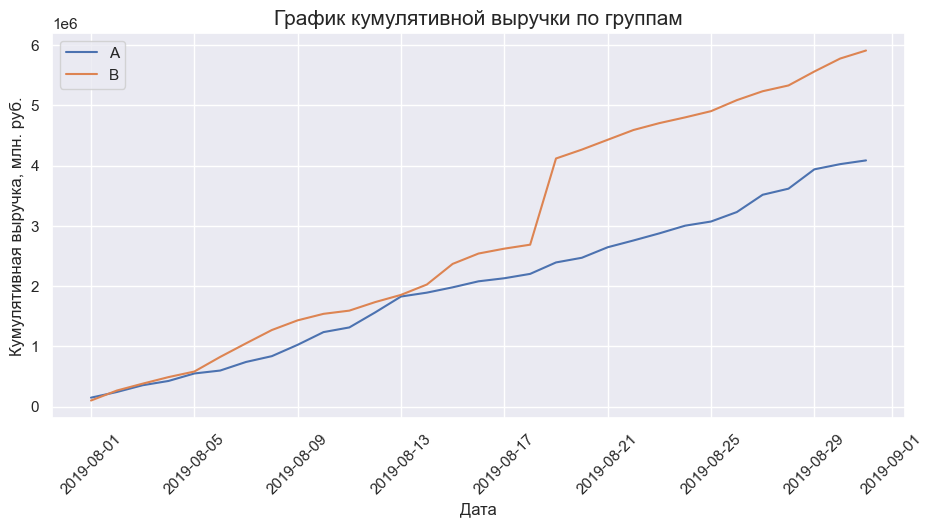

In [36]:
sns.set(rc={'figure.figsize':(11, 5)})
ax = sns.lineplot(data=cumulativeData, x="date", y="revenue", hue="group")
ax.set_title('График кумулятивной выручки по группам', fontsize = 15)
ax.set_xlabel("Дата")
ax.set_ylabel("Кумулятивная выручка, млн. руб.")
ax.legend(loc="upper left")
plt.xticks(rotation=45);

Кумулятивная выручка в группах A и B плавно растут. Группа B в среднем обгоняетя A на несколько сотен тысяч.

Однако 2019-08-19 в группе B происходит резкий скачок. А далее прирост продолжается в предешствующем тренде.

Скорее всего в данных есть выбросы (аномально крупные покупки).

### Построим график кумулятивного среднего чека по группам

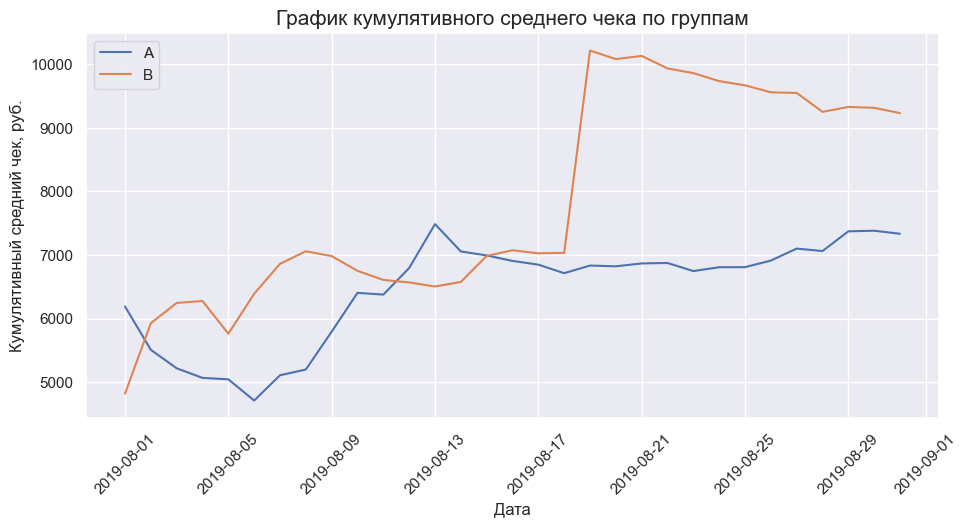

In [37]:
sns.set(rc={'figure.figsize':(11, 5)})
ax = sns.lineplot(data=cumulativeData, x="date", y=cumulativeData["revenue"]/cumulativeData["orders"], hue="group")
ax.set_title('График кумулятивного среднего чека по группам', fontsize = 15)
ax.set_xlabel("Дата")
ax.set_ylabel("Кумулятивный средний чек, руб.")
ax.legend(loc="upper left")
plt.xticks(rotation=45);

Средний чек стабилизируется к концу теста в группе A. Однако мы также видим скачок в группе B 2019-08-19, что и в графике с кумулятивной выручкой. Далее средний чек снижается.

Это подтверждает нашу гипотезу о выбросах.

### Построим график относительного изменения кумулятивного среднего чека группы B к группе A

In [38]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

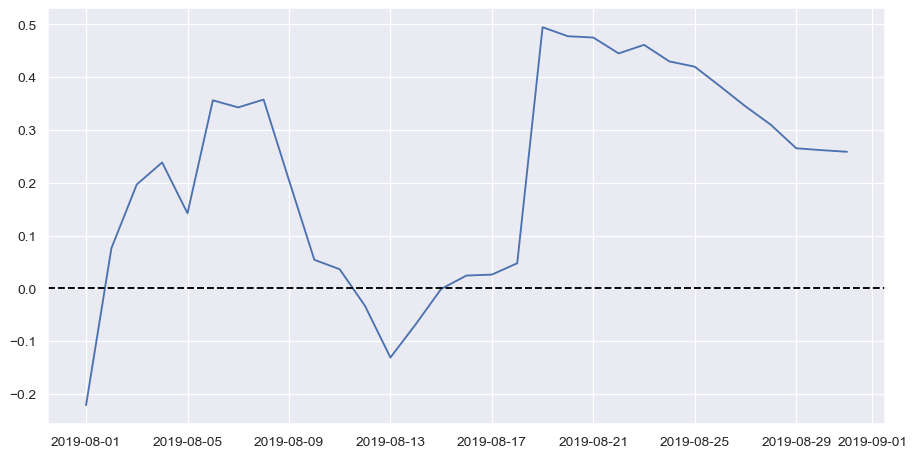

In [39]:
# зададим размеры графика
plt.figure(figsize=(12, 6), dpi=90)

# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--') ;

Есть резкие колебания в начале теста. Также в уже знакомую нам дату 2019-08-19.
Выбросы точно есть.

### Построим график кумулятивного среднего количества заказов на посетителя по группам

Для начала почитаем кумулятивные средние количесвта заказов на посетителя по группам (кумулятивные коверсиии по группам)

In [40]:
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

Теперь построим график.

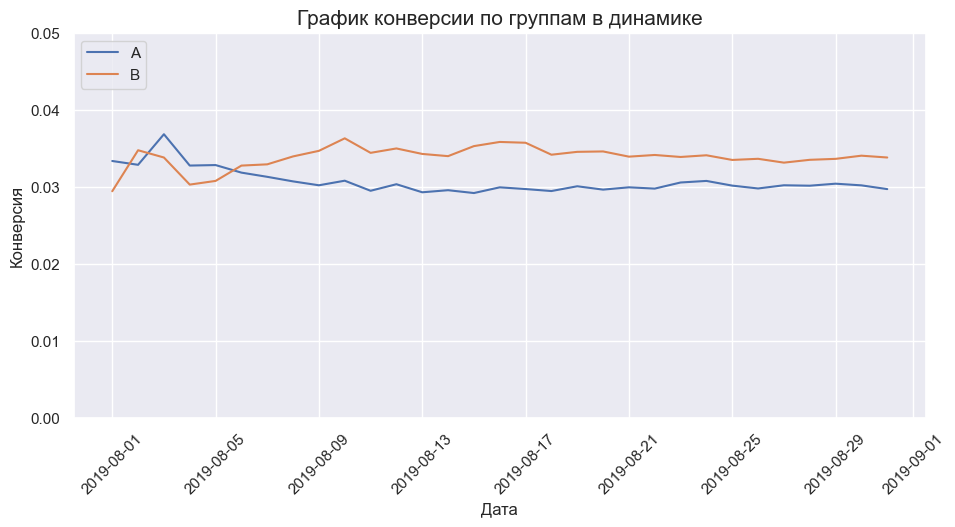

In [41]:
sns.set(rc={'figure.figsize':(11, 5)})
ax = sns.lineplot(data=cumulativeData, x="date", y="conversion", hue="group")
ax.set_title('График конверсии по группам в динамике', fontsize = 15)
ax.set_xlabel("Дата")
ax.set_ylabel("Конверсия")
ax.legend(loc="upper left")
plt.xticks(rotation=45)
plt.ylim(0, 0.05);

Конверсия колебелтся в начале экперимента, далее стабилизируется.

### Построим график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A

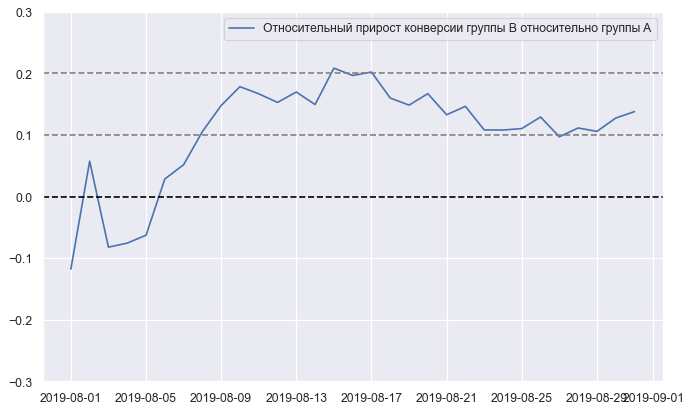

In [42]:
# объедним данные о конверсиях по группам в одну таблицу
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# зададим размеры графика
plt.figure(figsize=(10, 6), dpi=80)

plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")
plt.legend()

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.1, color='grey', linestyle='--')
plt.axhline(y=0.2, color='grey', linestyle='--')

# зададим размеры оси y
plt.ylim(-0.3, 0.3);

Изначально конверсия группы B была ниже, чем у А, сделала несколько колебаний, затем резко выросла и продолжает колебаться в коридоре между значениями 0,1 и 0,2.

### Постройте точечный график количества заказов по пользователям

Для начала посчитаем сколько заказов пиходится на каждого посетителя.

In [43]:
orders_by_user = orders.groupby(['visitorId','group'], as_index=False).agg({'transactionId': 'nunique'})\
.sort_values(by='transactionId', ascending=False)

In [44]:
# переименуем столбцы
orders_by_user.columns = ['visitorId', 'group', 'orders_cnt']

In [45]:
orders_by_user

visitorId group  orders_cnt
1079  4256040402  A     7         
619   2458001652  B     6         
511   2038680547  A     5         
596   2378935119  B     5         
618   2458001652  A     5         
...          ... ..    ..         
374   1476256851  A     1         
375   1476741193  B     1         
376   1484903144  A     1         
377   1485964287  A     1         
1088  4283872382  B     1         

[1089 rows x 3 columns]

Построим точечный график, пометим принадлежность к группам A и B разными цветами.

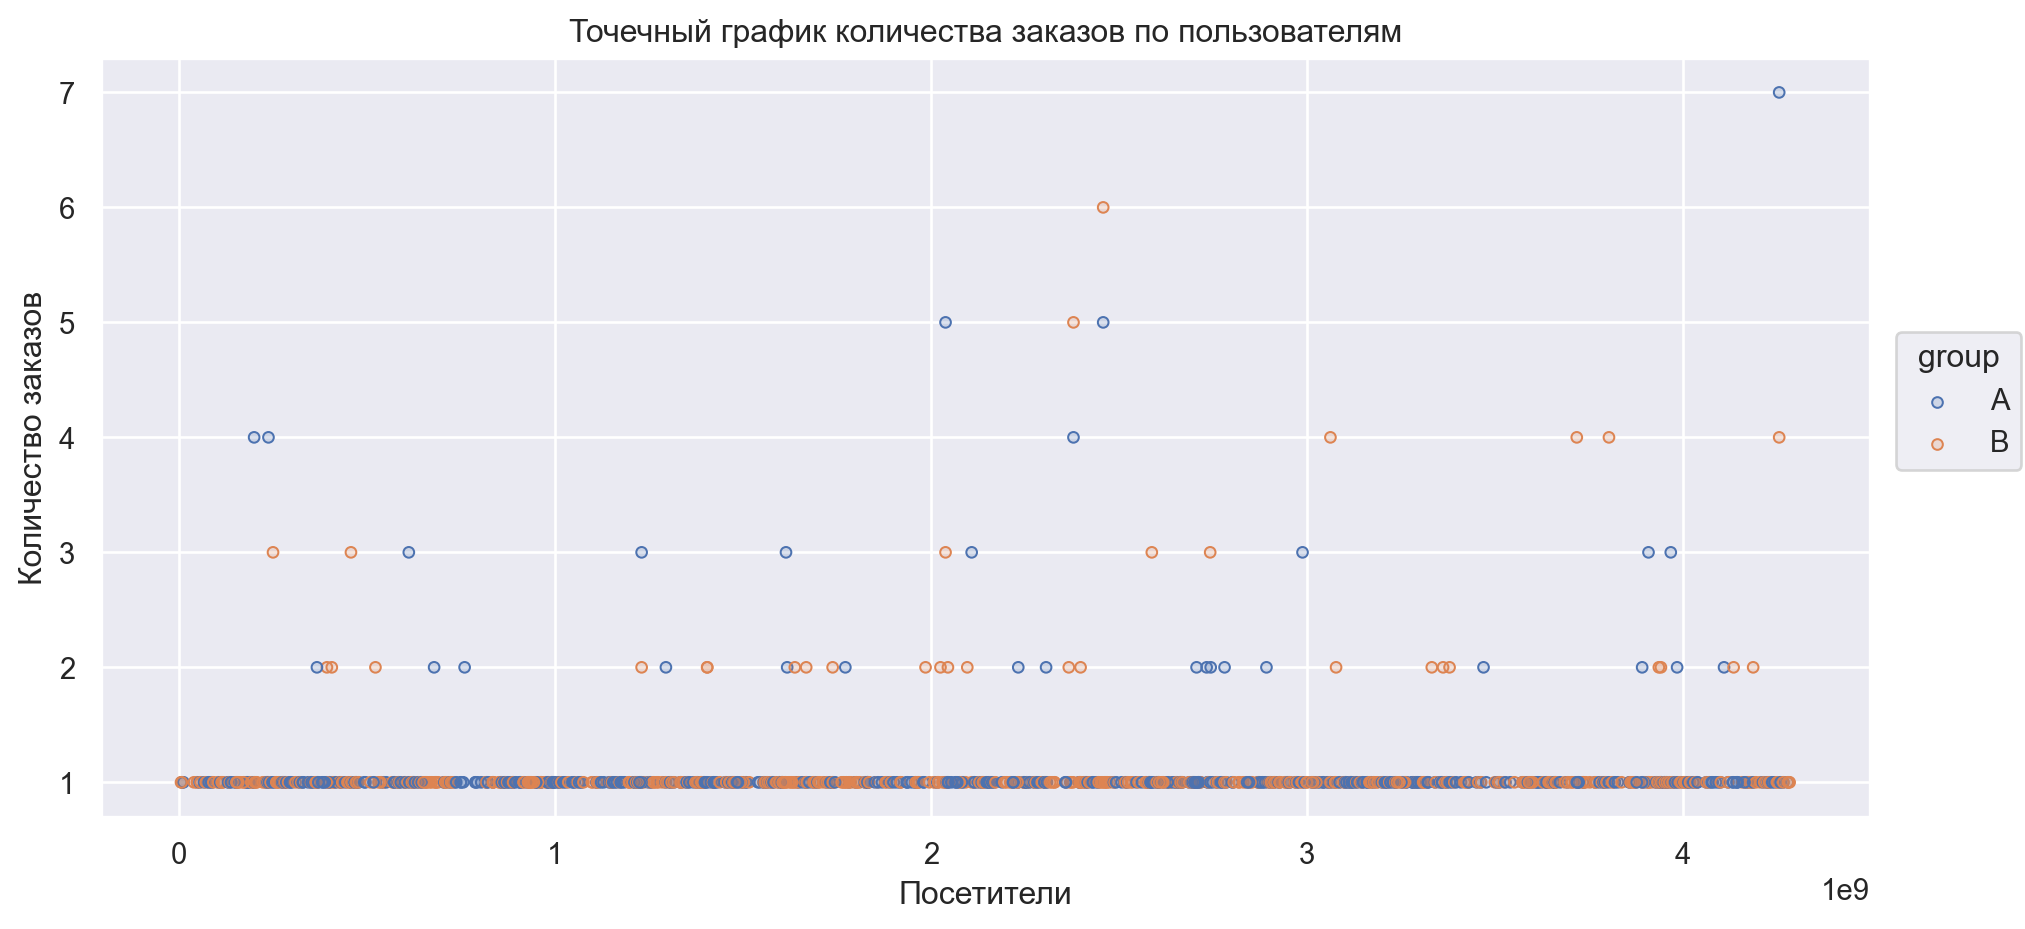

In [46]:
p1 = so.Plot(orders_by_user, "visitorId", "orders_cnt")
p1.add(so.Dots(), color="group").label(title="Точечный график количества заказов по пользователям", 
       x="Посетители", y="Количество заказов").layout(size=(10, 5))


Подавляющее большинство пользователей совершили не более одного заказа. 

Среди пользователей совершивших более одного заказа пропорции между группами A и B примерно равны. Наибольшее количество заказво на одного пользователя равно 7.

### Посчитаем 95-й и 99-й перцентили количества заказов на пользователя. Выберем границу для определения аномальных пользователей.

In [47]:
np.percentile(orders_by_user['orders_cnt'], [95, 99])

array([2., 4.])

Всего 5% покупателей сделали более 2-х заказов. Всего 1% польователей сделали более 4-х заказов.

За границу определения аномальных пользователей возьмём 99%.

### Построим точечный график стоимостей заказов. 

In [48]:
fig = px.scatter(orders, x="visitorId", y="revenue", color="group", symbol="group",
              title='Точечный график стоимостей заказов',
             labels = {"visitorId":"Посетители", "revenue":"Стоимость заказа", "group":"Группы"})
fig.show()

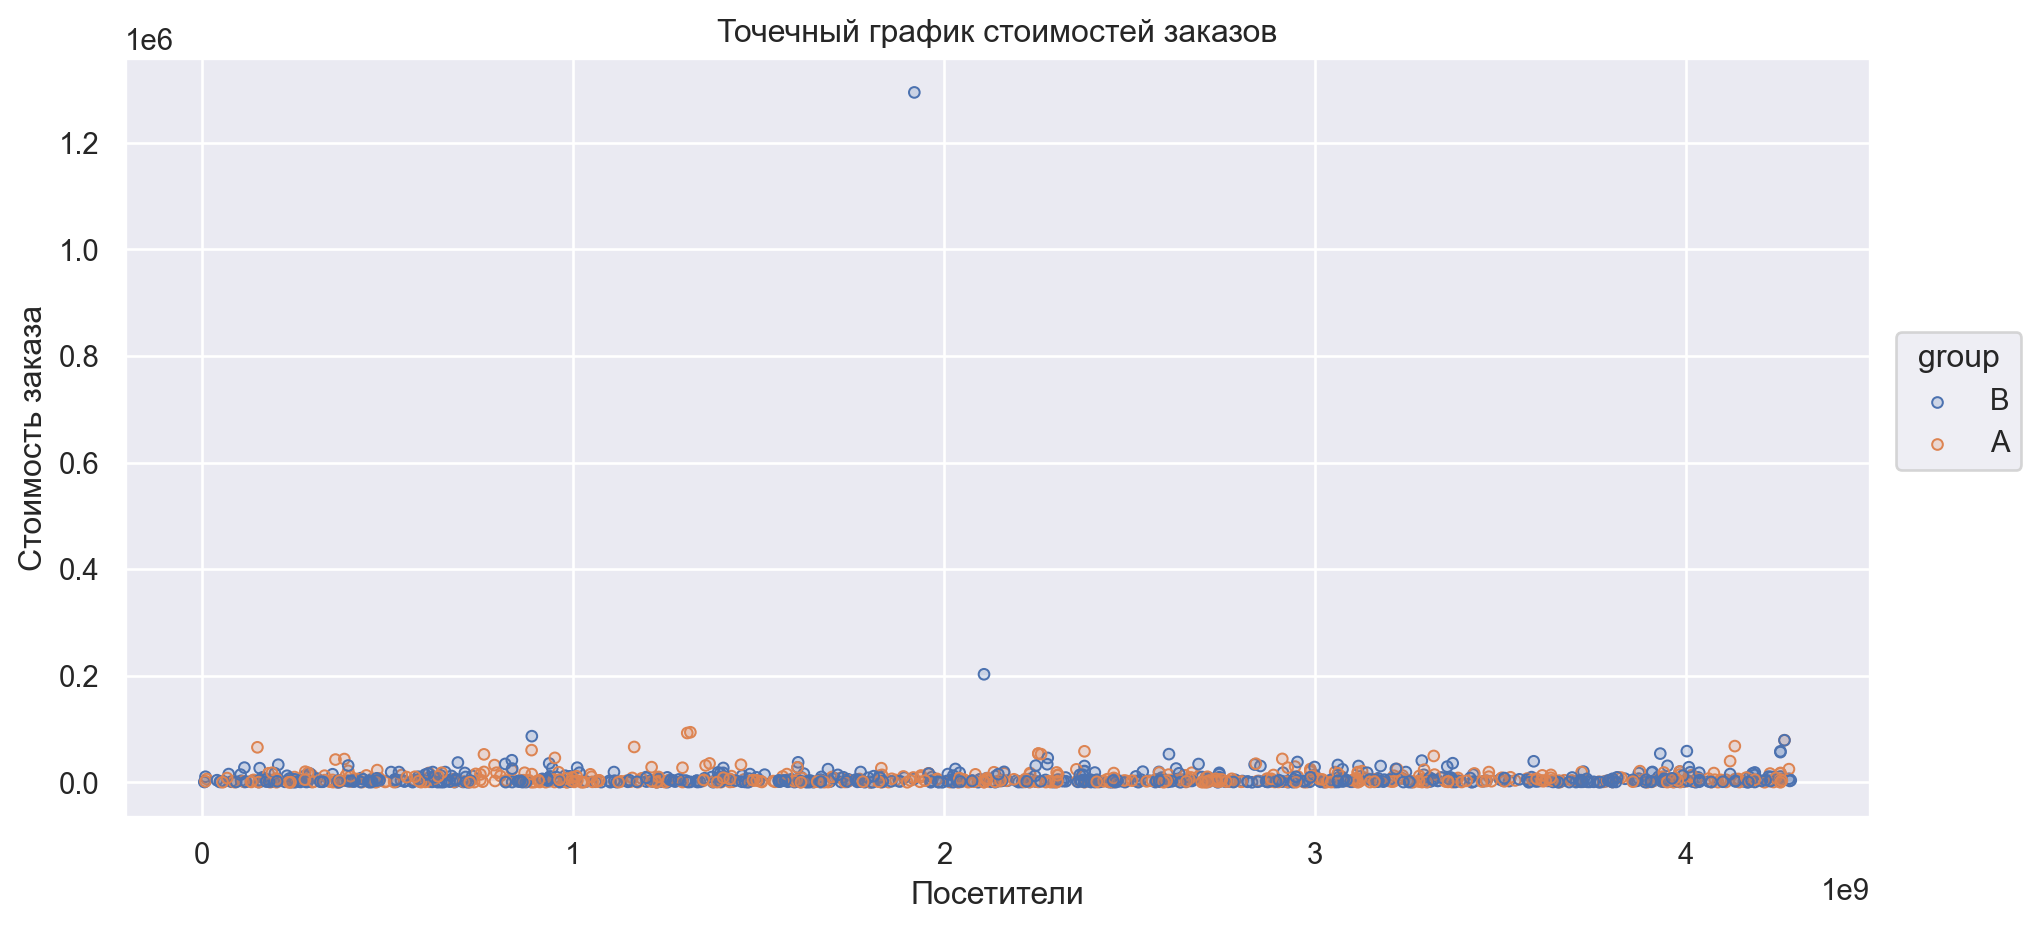

In [49]:
p1 = so.Plot(orders, "visitorId", "revenue")
p1.add(so.Dots(), color="group").label(title="Точечный график стоимостей заказов", 
       x="Посетители", y="Стоимость заказа").layout(size=(10, 5))

Судя по графику в основном суммы заказов находятся в диапазоне до 50 тыс.

Мы видим, что есть выбросы - заказы с суммами в разы превышающими суммы большей части заказов. Самый большой выброс на сумму 1, 294 млн.

Интересно посмотреть, когда был сделаан этот аномальный заказ. Построим точечный график с распределением сумм заказов по датам.

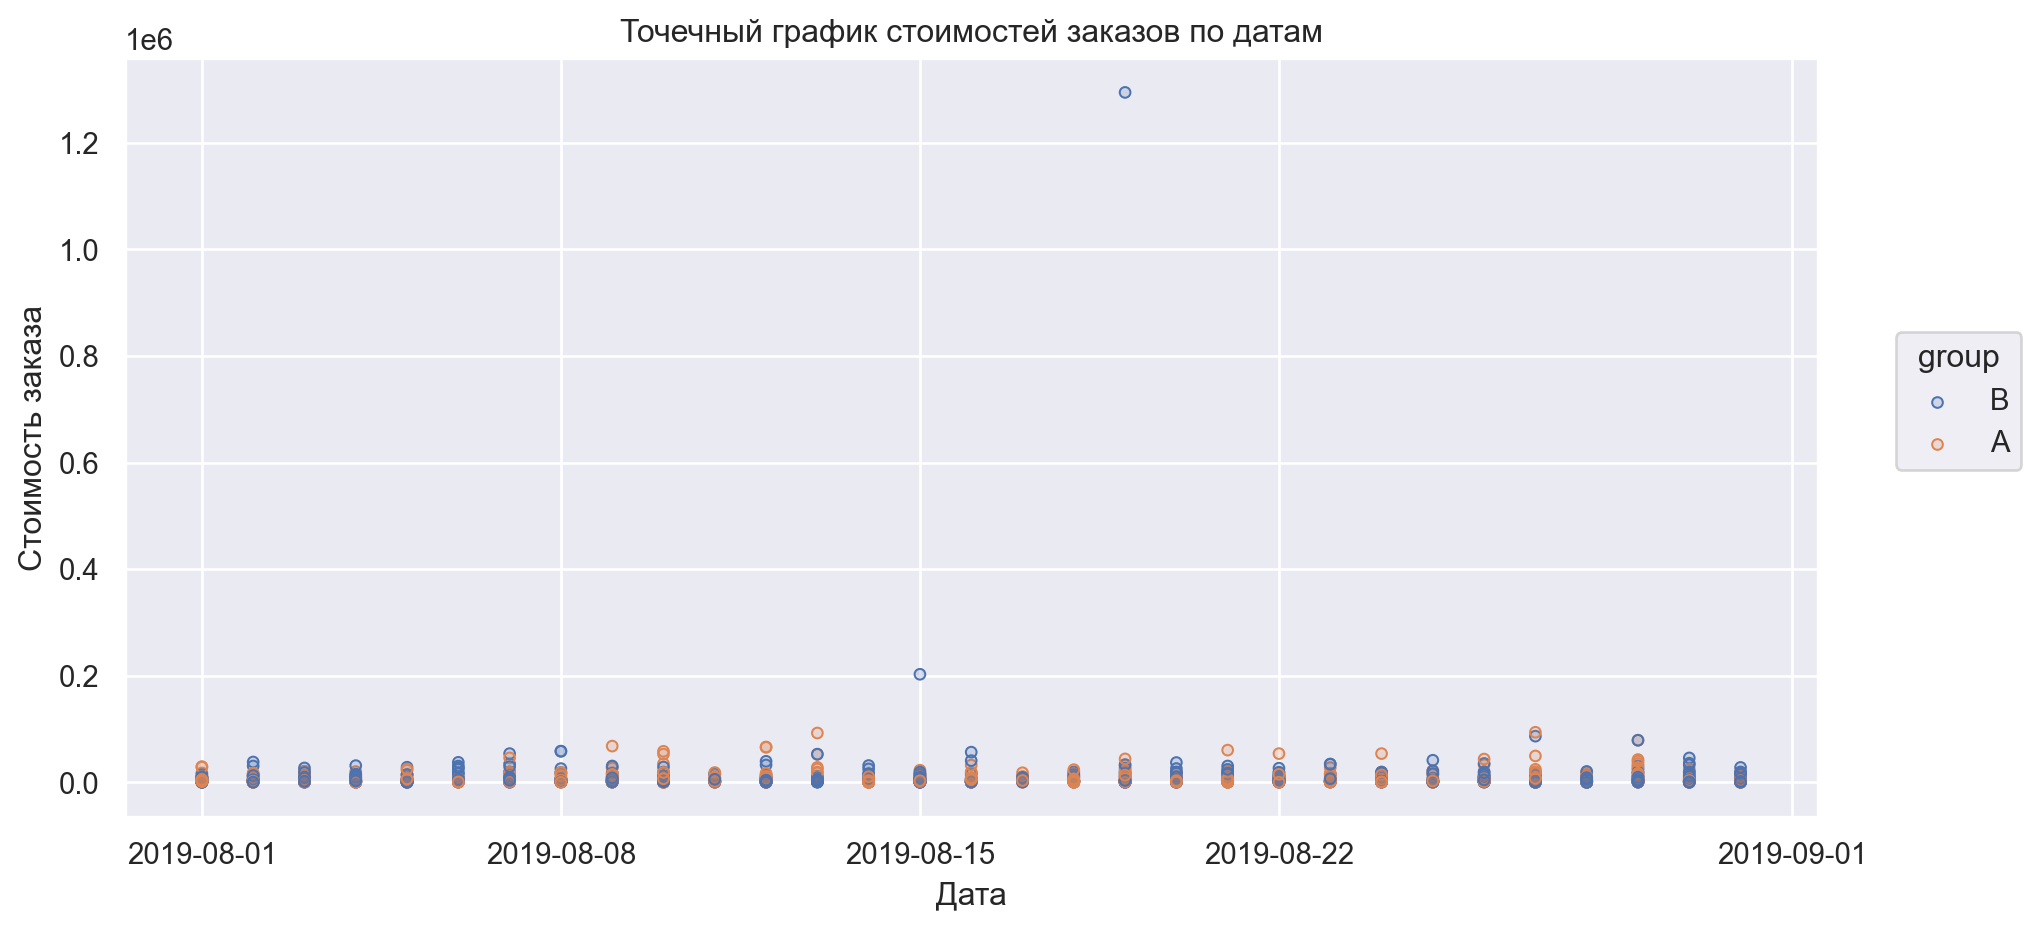

In [50]:
p1 = so.Plot(orders, "date", "revenue")
p1.add(so.Dots(), color="group").label(title="Точечный график стоимостей заказов по датам", 
       x="Дата", y="Стоимость заказа").layout(size=(10, 5))

Аномальный заказ был сделан 19 августа 2019. Мы увидели его влияние ранее на графиках с кумулятивной выручкой и средним чеком в группе B. Наше предположение о влиянии аномалий на кумулятивные показатели подтвердилось.

### Посчитаем 95-й и 99-й перцентили стоимости заказов. Выберем границу для определения аномальных заказов.

In [51]:
np.percentile(orders['revenue'], [95, 99])

array([28000. , 58233.2])

Менее 5% покупателей совершили покупки на сумму более 28 000. Менее 1% покупателей совершили покупки на сумму более 58 233.

В качестве границы для определения аномальных заказов выбере границу в 99%.

### Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным.

В качестве уровня статистической значимости `alpha` мы выберали 0,05.

Подготовим данные для проверок статистической значимости.

In [52]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)


Выведем получившуюся таблицу.

In [53]:
data.head(5)

date  ordersPerDateA  revenuePerDateA  ordersPerDateB  \
0 2019-08-01  24              148579           21               
1 2019-08-02  20              93822            24               
2 2019-08-03  24              112473           16               
3 2019-08-04  16              70825            17               
4 2019-08-05  25              124218           23               

   revenuePerDateB  ordersCummulativeA  revenueCummulativeA  \
0  101217           24                  148579                
1  165531           44                  242401                
2  114248           68                  354874                
3  108571           84                  425699                
4  92428            109                 549917                

   ordersCummulativeB  revenueCummulativeB  visitorsPerDateA  \
0  21                  101217               719                
1  45                  266748               619                
2  61                  380996               507                
3  78                  489567               717                
4  101                 581995               756                

   visitorsPerDateB  visitorsCummulativeA  visitorsCummulativeB  
0  713               719                   713                   
1  581               1338                  1294                  
2  509               1845                  1803                  
3  770               2562                  2573                  
4  707               3318                  3280

Значения столбцов:

- `date` — дата;
- `ordersPerDateA` — количество заказов в выбранную дату в группе A;
- `revenuePerDateA` — суммарная выручка в выбранную дату в группе A;
- `ordersPerDateB` — количество заказов в выбранную дату в группе B;
- `revenuePerDateB` — суммарная выручка в выбранную дату в группе B;
- `ordersCummulativeA` — суммарное число заказов до выбранной даты включительно в группе A;
- `revenueCummulativeA` — суммарная выручка до выбранной даты включительно в группе A;
- `ordersCummulativeB` — суммарное количество заказов до выбранной даты включительно в группе B;
- `revenueCummulativeB` — суммарная выручка до выбранной даты включительно в группе B;
- `visitorsPerDateA` — количество пользователей в выбранную дату в группе A;
- `visitorsPerDateB` — количество пользователей в выбранную дату в группе B;
- `visitorsCummulativeA` — количество пользователей до выбранной даты включительно в группе A;
- `visitorsCummulativeB` — количество пользователей до выбранной даты включительно в группе B.

Посчитаем статистическую значимость различия в среднем количестве заказов между группами.
Создадим переменные `ordersByUsersA` и `ordersByUsersB` со столбцами `['userId', 'orders']`. В них для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов. 

In [54]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitorId', 'orders'] 

Объявим переменные `sampleA` и `sampleB`, в которых пользователям из разных групп будет соответствовать количество заказов. Тем, кто ничего не заказал, будут соответствовать нули.

In [55]:
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

**СФормулируем гипотезы:**

Нулевая гипотеза (H0): различий в среднем количестве заказов на посетителя между группами нет.

Альтернативная гипотеза (H1): различия в среднем количестве заказов на посетителя между группами есть.

---

Нулевая гипотеза (H0): различий в среднем чеке между группами нет.

Альтернативная гипотеза (H1): различия в среднем чеке между группами есть.

---
При проверке гипотез мы будем использовать метод тестирования (критерий) Манна-Уитни.

Ключевая идея — проранжировать две выборки по порядку от меньшего к большему и сравнить ранги одних и тех же значений, попавших в обе выборки. Ранг — это место в упорядоченной выборке. Разница между рангами одних и тех же значений может быть одинакова, и такой сдвиг называют типичным. Значит, просто добавились значения, сдвинувшие все остальные. 

А нетипичные сдвиги по рангу рассматриваются как изменения. Сумма рангов таких сдвигов и выступает значением критерия. Чем он выше — тем больше вероятность, что для этих выборок интересующая нас величина различается.

Вероятности получения разных значений критерия Манна-Уитни рассчитаны теоретически, что даёт возможность делать вывод о различии или его отсутствии для любого заданного уровня значимости.

---

`P-value` - это вероятность получить определённый результат при условии, что он относится к генеральной совокупности. (В нашем случае результат группы B, при условии что он принадлежит той же генеральной совокупности, что и группа А)

В качестве параметра в первом тесте мы будем проверять среднее количество заказов на посетителя между группами.

В качестве параметра во втором тесте мы будем проверять средний чек между группами.

В качестве уровня статистической значимости `alpha` выберем 0,05.

Применим критерий и отформатируем `p-value`, округлив его до трёх знаков после запятой.

Также выведем относительный прирост среднего числа заказов группы B, округлим его до трёх знаков после запятой

In [56]:
print("P-value: {0:.3f}".format(st.mannwhitneyu(sampleA, sampleB)[1]))

print("Относительный прирост среднего числа заказов группы B: {0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

P-value: 0.017
Относительный прирост среднего числа заказов группы B: 0.138


**ВЫВОД**

При анализе конверсии на "сырых" данных мы получили `P-value` 0,017, это меньше уровня значимости `alpha`, который мы установили на уровне 0,05. На основании данного теста у нас есть основания отвергнуть нулевую гипотезу. 

Относительный прирост среднего числа заказов группы B также лучше чем в группе А: 0.138.

Однако, мы ещё не обработали выбросы. Пока не будем делать поспешных выводов.

### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным

In [57]:
print('P-value: {0:.3f}'.format(st.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('Относительный прирост среднего чека в группе B: {0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

P-value: 0.729
Относительный прирост среднего чека в группе B: 0.259


**ВЫВОД**

При анализе среднего чека на "сырых" данных мы получили `P-value` 0,729, это значительно выше уровня значимости `alpha`, который мы установили на уровне 0,05. На основании данного теста у нас нет основания отвергнуть нулевую гипотезу. 

Тем не меннее относительный прирост среднего чека в группе B по тношению к группе А составил 0.259.

Однако, мы ещё не обработали выбросы. Пока не будем делать поспешных выводов.

### Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным

Примем за аномальных пользователей тех, кто совершил от 4 заказов или совершил заказ дороже 58 233 рублей.

Посмотрим, сколько всего аномальных пользователей, согласно пинятому критерию.

In [58]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] >= int(np.percentile(orders_by_user['orders_cnt'], [99]))]['visitorId'],
        ordersByUsersB[ordersByUsersB['orders'] >= int(np.percentile(orders_by_user['orders_cnt'], [99]))]['visitorId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > int(np.percentile(orders['revenue'], [99]))]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5))
print(abnormalUsers.shape[0]) 

1099    148427295
18      199603092
23      237748145
949     887908475
744     888512513
Name: visitorId, dtype: int64
20


Мы выявили 20 пользователей с аномальными заказами.

Уберём их из данных.

In [59]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) 

Теперь посмотрим как это повлияет на результаты тестов.

In [60]:
print('P-value: {0:.3f}'.format(st.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('Относительный прирост среднего числа заказов группы B: {0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

P-value: 0.014
Относительный прирост среднего числа заказов группы B: 0.151


**ВЫВОД**

При анализе конверсии на "очищенных" от выбросов данных мы получили `P-value` 0,014, это меньше уровня значимости `alpha`, который мы установили на уровне 0,05. Это ещё меньше, чем на "сырых" данных. На основании данного теста у нас есть основания отвергнуть нулевую гипотезу.

Относительный прирост среднего числа заказов группы B также лучше чем в группе А: 0.151. Это больше, чем при тесте на "сырых" данных.

### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным

In [61]:
print(
    'P-value: {0:.3f}'.format(
        st.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    "Относительный прирост среднего чека в группе B: {0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
) 

P-value: 0.959
Относительный прирост среднего чека в группе B: -0.014


**ВЫВОД**

При анализе среднего чека на "очищенных" от выбросов данных мы получили `P-value` 0,959, это значительно выше уровня значимости `alpha`, который мы установили на уровне 0,05. На основании данного теста у нас нет основания отвергнуть нулевую гипотезу. И ещё больше, сем при анализе на "сырых" данных.

Относительный прирост среднего чека в группе B по тношению к группе А составил - 0.014.

### Решение по результатам теста: остановить тест, зафиксировать победу группы B


При анализе "сырых" данных мы зафиксировали следующие результаты тестов:

- При анализе конверсии на "сырых" данных мы получили `P-value` 0,017, это меньше уровня значимости `alpha`, который мы установили на уровне 0,05. На основании данного теста у нас есть основания отвергнуть нулевую гипотезу. 

- Относительный прирост среднего числа заказов группы B также лучше чем в группе А: 0.138.

- При анализе среднего чека на "сырых" данных мы получили `P-value` 0,729, это значительно выше уровня значимости `alpha`, который мы установили на уровне 0,05. На основании данного теста у нас нет основания отвергнуть нулевую гипотезу. 

- Тем не меннее относительный прирост среднего чека в группе B по тношению к группе А составил 0.259.

После "очистки" данных от выбросов мы получили следующие результаты:

- При анализе конверсии на "очищенных" от выбросов данных мы получили `P-value` 0,014, это меньше уровня значимости `alpha`, который мы установили на уровне 0,05. Это ещё меньше, чем на "сырых" данных. На основании данного теста у нас также есть основания отвергнуть нулевую гипотезу.

- Относительный прирост среднего числа заказов группы B также лучше чем в группе А: 0.151. Это больше, чем при тесте на "сырых" данных.

- При анализе среднего чека на "очищенных" от выбросов данных мы получили `P-value` 0,959, это значительно выше уровня значимости `alpha`, который мы установили на уровне 0,05. На основании данного теста у нас нет основания отвергнуть нулевую гипотезу. И ещё больше, сем при анализе на "сырых" данных.

- Относительный прирост среднего чека в группе B по тношению к группе А составил - 0.014.


Мы получили статистически значимый результат при анализе конверсии - конверсия в группе B выше.

При анализе среднего чека статистически значимой разницы в показателях групп А и В нет - нет оснований считать, что средний чек у двух групп отличается.

Поэтому рекомендуется остановить тест и зафиксировать победу группы B.

При одинаковом среднем чеке конверсия в заказ будет выше и наш бизнес больше заработает.

## Выводы

Мы провели оценку гипотез по фреймворкам ICE и RICE.

При оценке по ICE, которая не учитывает охват аудитории в первой тройке по убыванию 8, 0 и 7 гипотезы.

При оценке по RICE картина изменилась, так как мы добавили в оценку охват. Действительно, для нас важны не только влияние, наша уверенность и затраты на проверку гипотезы, но и ещё количество пользователей, на которых будут распространяться изменения.

На первое место вышла 7 гипотеза, так как имеет наибольший охват. Следом идут 2 и 0 гипотезы.

8 гипотиза после добавления параметра Reach опустилась в середину списка, так как имеет наименьший охват.

Исходя из оценки по RICE, есть смысл проверять гипотезы по списку по порядку от большего значения к меньшему.

---

Мы получили статистически значимый результат при анализе конверсии - конверсия в группе B выше.

При анализе среднего чека статистически значимой разницы в показателях групп А и В нет - нет оснований считать, что средний чек у двух групп отличается.

Поэтому рекомендуется остановить тест и зафиксировать победу группы B.

При одинаковом среднем чеке конверсия в заказ будет выше и наш бизнес больше заработает.